In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [3]:
ad_conversion = pd.read_csv('ad_conversion.csv')
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


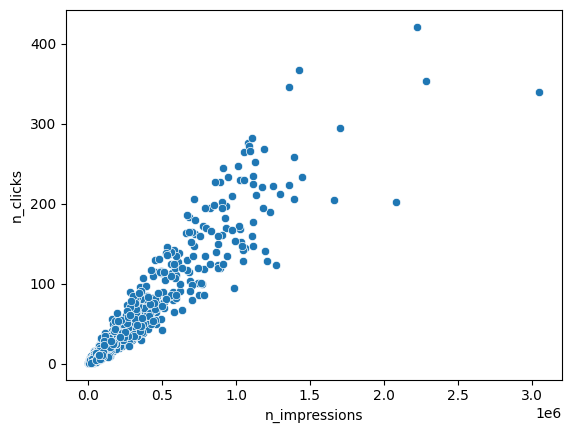

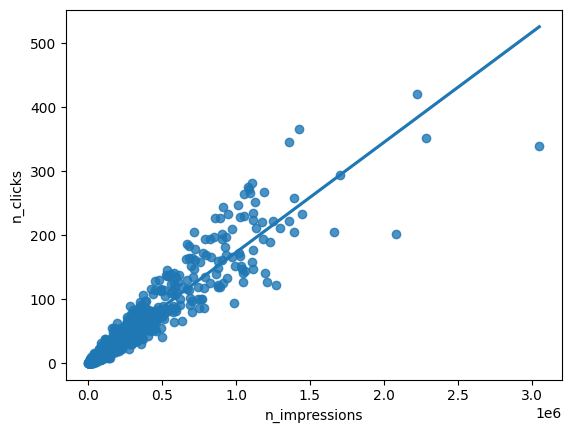

In [4]:
sns.scatterplot(x='n_impressions',y='n_clicks',data=ad_conversion)
plt.show()

sns.regplot(x='n_impressions',y='n_clicks',data=ad_conversion,ci=None)
plt.show()

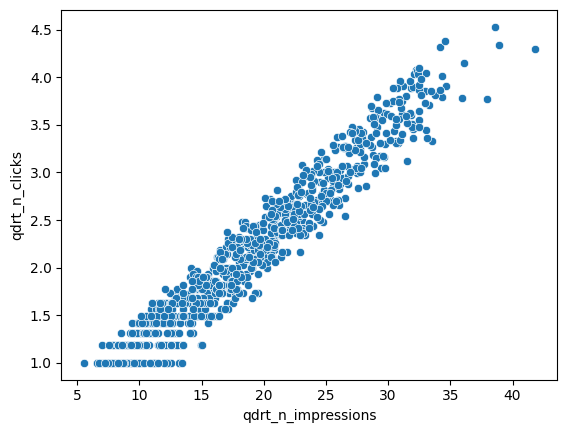

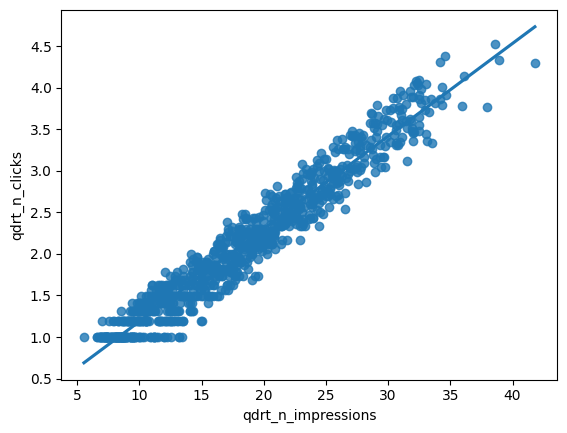

In [6]:
ad_conversion['qdrt_n_impressions'] = ad_conversion['n_impressions'] ** 0.25
ad_conversion['qdrt_n_clicks'] = ad_conversion['n_clicks'] ** 0.25

sns.scatterplot(x='qdrt_n_impressions',y='qdrt_n_clicks',data=ad_conversion)
plt.show()

sns.regplot(x='qdrt_n_impressions',y='qdrt_n_clicks',data=ad_conversion,ci=None)
plt.show()

In [7]:
mdl_click_vs_impression = ols('qdrt_n_clicks ~ qdrt_n_impressions',data=ad_conversion).fit()
print(mdl_click_vs_impression.params)


Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64


In [9]:
explanatory_data = pd.DataFrame(
    {
        "qdrt_n_impressions" : np.arange(0,3000000,500000) ** 0.25,
        "n_impressions" : np.arange(0,3000000,500000)
    }
)

prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000              0       0.071748
1           26.591479         500000       3.037576
2           31.622777        1000000       3.598732
3           34.996355        1500000       3.974998
4           37.606031        2000000       4.266063
5           39.763536        2500000       4.506696


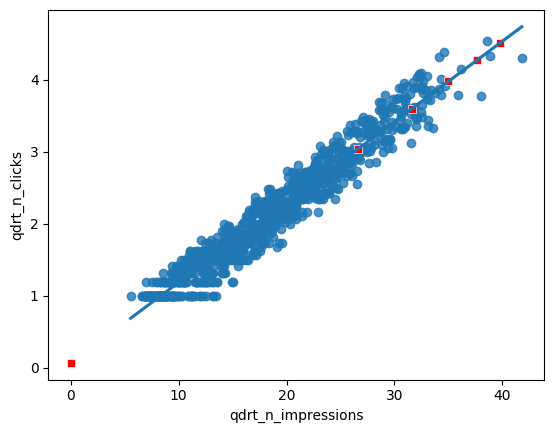

In [10]:
sns.regplot(x='qdrt_n_impressions',y="qdrt_n_clicks",data=ad_conversion,ci=None)
sns.scatterplot(x='qdrt_n_impressions',y='qdrt_n_clicks',data=prediction_data,color='red',marker='s')
plt.show()

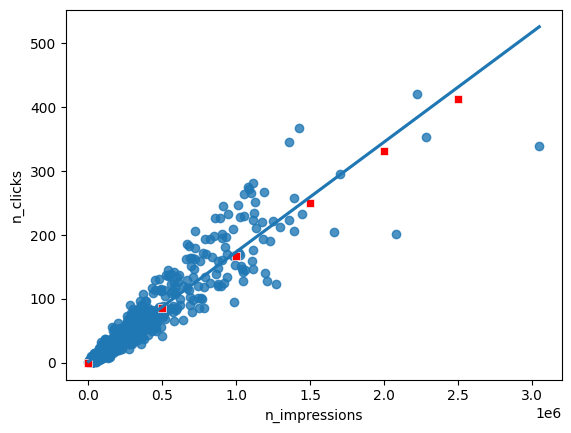

In [11]:
prediction_data['n_clicks'] = prediction_data['qdrt_n_clicks'] ** 4


sns.regplot(x='n_impressions',y='n_clicks',data=ad_conversion,ci=None)
sns.scatterplot(x='n_impressions',y='n_clicks',data=prediction_data,color='red',marker='s')
plt.show()

In [12]:
mse = mdl_click_vs_impression.mse_resid
print('mse: ',mse)


mse:  0.03877213389297149


Since MSE is 0.039 and it is closed to 0, we can determine that this model is a good fit.

In [13]:
rse = np.sqrt(mse)
print('rse: ',rse)

rse:  0.19690640896875725
